# Harnessing Matplotlib & Astropy

## Matplotlib.pyplot

### This Tutorial:

`matplotlib.pyplot` is a powerful graphics module often used by Python developers. (Check out [this gallery](https://matplotlib.org/gallery.html) to get a sense of what you can do with pyplot.) This is by no means a comprehensive tutorial, but it will point out a few important things about `matplotlib.pyplot` objects and give advice about incorporating plotting functionality in your open-source astronomy software.

There are other (excellent) plotting tools in common practice in astronomy, especially plotly and bokeh. We encourage you to look into these tools as well, but we'll only discuss `matplotlib.pyplot` here.

In [1]:
!pip install orbitize --upgrade

### Tutorial Starts Here.

`matplotlib.pyplot` relies on the concept of **changing state**. The **state** of a programming environment is what determines the program's behavior. For example, when you type:

``` >> import  orbitize```

into Python, you are modifying your environment's state. Before you typed ```import orbitize```, if you tried to run something like ```orbitize.plot.OrbitPlot()```, you would get an import error. However, in running the import command, you modified the state of your environment, and when you try ```orbitize.plot.OrbitPlot()```, you'll get something totally different! Nothing about the ```orbitize.plot.OrbitPlot()``` code changed, but because your environment's **state** changed, the output also changed.

An excellent example of this concept as it applies to matplotlib is the `matplotlib.rcParams` object, which is like a dictionary that controls the default behaviors of matplotlib plots. When you type:

```>> import matplotlib```

the `matplotlib.rcParams` object is automatically defined and given some default values. This is how, for example, matplotlib knows how large to make fonts and figures. It also means that you can control the default behavior of matplotlib plots by updating state via `matplotlib.rcParams`.

That was a lot of words! Let's see an example.

We'll start by using the `update()` method of `matplotlib.rcParams` to change the default font size:


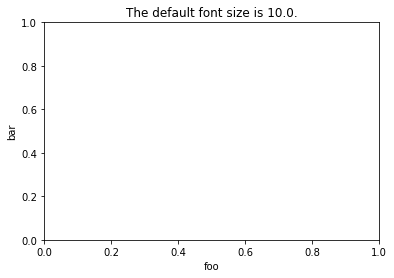

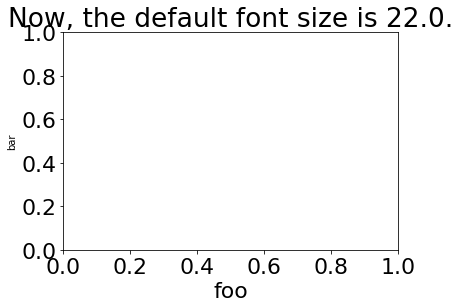

In [2]:
%matplotlib inline

from matplotlib import rcParams
import matplotlib.pyplot as plt

# make a plot
plt.figure()
plt.title('The default font size is {}.'.format(rcParams['font.size']))
plt.xlabel('foo'); plt.ylabel('bar')

# update the current state. This command doesn't have any output! It just affects
#   the state of the environment.
rcParams.update({'font.size': 22})

# make another plot
plt.figure()
plt.title('Now, the default font size is {}.'.format(rcParams['font.size']))
plt.xlabel('foo'); plt.ylabel('bar', fontsize=10)

# update the current state again
rcParams.update({'font.size': 12})

As you can see, `matplotlib` decides on a default font size by checking the *current* value of the state parameter `rcParams['font.size']`, but this is always overwritten if you pass in a keyword (in this case, the font size of the y axis label).

The basic "unit" of `matplotlib.pyplot` is [the `Figure` object](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), which acts as a container for all the other plot elements. Let's look at a few different ways to create a `Figure` object:

<class 'matplotlib.figure.Figure'>


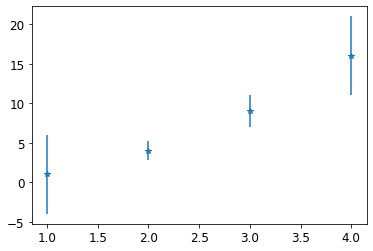

In [3]:
import numpy as np

# create some sample data
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
y_error = np.array([5, 1.2, 2, 5])

fig = plt.figure() # initializes a `Figure` object
plt.errorbar(      # plots data points and error bars onto the current `Figure`
    x, y, y_error, ls='', fmt="*"  # ls='' sets "no line" as the line style
                                   # fmt="*" sets stars as the data marker
)  

print(type(fig))

The current figure changes (i.e. the *state* is updated) when you initialize a new `Figure` object. Unless you specify a particular `Figure` object, `plt.___()` functions will always add to the current `Figure` object. That is a nice feature-- it makes it easy to add multiple types of plots onto the same figure.

Let's look at another way to initialize a new `Figure` object:

fig type: <class 'matplotlib.figure.Figure'>
ax type: <class 'numpy.ndarray'>
ax[0] type: <class 'matplotlib.axes._subplots.AxesSubplot'>


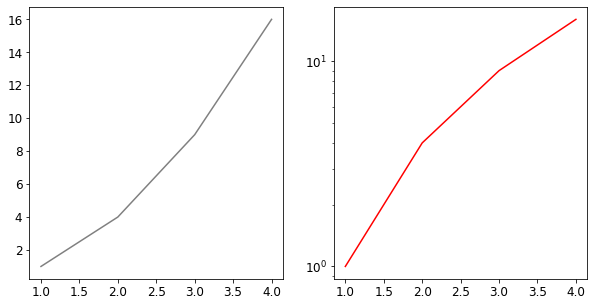

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(x, y, color='grey')
ax[1].plot(x, y, color='red')
ax[1].set_yscale('log')

print('fig type: {}'.format(type(fig)))
print('ax type: {}'.format(type(ax)))
print('ax[0] type: {}'.format(type(ax[0])))

Here we've encountered another kind of object: [the `Axes` object](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). These objects are containers for all the plot elements *in a particular figure panel*. `Axes` are attributes of `Figure` objects:

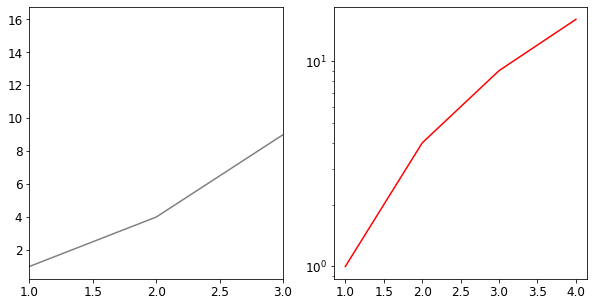

In [5]:
fig.axes[0].set_xlim(1, 3)
fig

Two useful methods to keep in mind are `plt.gca()` and `plt.sca()` (get/set current `Axes`). Let's see how they work:

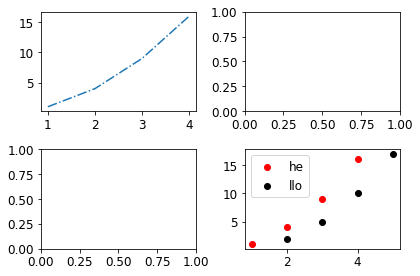

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2)

mystery_axes = plt.gca()              # get current Axes
mystery_axes.scatter(x, y, color='r', label='he')# acts on `mystery_axes`
mystery_axes.scatter(x + 1, y + 1, color='k', label='llo')
mystery_axes.legend()

plt.sca(ax[0,0])        # set current Axes
plt.plot(x, y, ls='-.') # acts on current Axes
plt.tight_layout()      # prettify


### General tips:
- **Don't overengineer your plotting code.** This means you don't need to add a million keywords anticipating every possible tweak your users might wish to make. Focus on making it easy for your users to modify the code themselves. Make sure you return `Figure` and `Axes` objects (more on this below) to your user so they can easily modify plots.
- **Apply principles of good design.** This means using color palettes with lots of contrast, making your fonts large and easy-to-read, and making sure your plots are colorblind friendly. (There are several great colorblindness simulators out there, for example [this one](https://www.color-blindness.com/coblis-color-blindness-simulator/).) It's also good to differentiate plot elements in more than one way (ex: one line is black and dashed, another is red and solid). 

## Matplotlib activities

After you've spent some time working on the numpy/pandas activities, return here and work on the activities below. 

### Roles:
- Driver (person who likes chocolate ice cream the most)
- Moderator (person who likes chocolate ice cream the least)
- Navigators (>= 1 person)

### Product:
- Paste your plots in [this Google Doc](https://docs.google.com/document/d/1KqO-EFO2PDdhoQN_A1_SivkQ8mpf5G4l2dAXELebvZ8/edit?usp=sharing) for everyone to admire!

#### Activity #1 

Let's practice working with `Figure` and `Axes` objects. Run the code snippet below to generate some orbits and plot them using `orbitize!`

The code below uses random sampling of a probability distribution to generate orbits consistent with data of a planet's position over time. [Here's](https://www.youtube.com/watch?v=NaO01BO8X70&ab_channel=KhanAcademyLabs) a quick overview of random sampling if you're interested!

<Figure size 1008x432 with 0 Axes>

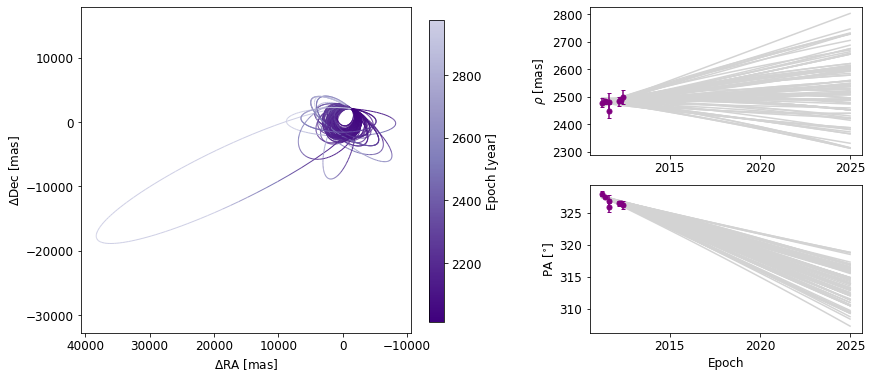

In [7]:
import orbitize.driver

# set up fit
myDriver = orbitize.driver.Driver(
    '{}/GJ504.csv'.format(orbitize.DATADIR),
    'OFTI', 1, 1.22, 56.95, mass_err=0.08, plx_err=0.26
)
s = myDriver.sampler

# run orbitize!
orbits = s.run_sampler(100)
myResults = s.results

# make plot
epochs = myDriver.system.data_table['epoch']
orbit_figure = myResults.plot_orbits(
    start_mjd=epochs[0]
)

Notice that the last line of this snippet returns the `Figure` object used to make the plot above. This is good practice-- it lets your users more easily customize figures, just as you're about to do!

Tasks:
- Change the x-axis limits of the top right panel to 2011-2015.
- Add a black star at (0, 0) in the leftmost panel.
- Change the dpi (dots per inch, a measure of resolution) of the Figure to 250.
- Save the figure to your Desktop using [`plt.savefig()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.savefig.html). 

### (Optional) Activity #2

Use `gridspec` (Google it!) to create a basic [corner plot](https://corner.readthedocs.io/en/latest/pages/quickstart.html). Plot the samples generated in the code snippet below. Your corner plot must:
- display histograms along the diagonal
- display a contour plot along the non-diagonal
- handle 2-dimensional arrays

Your corner plot may, if you have time/interest:
- be super pretty
- handle N-dimensional arrays

In [8]:
import numpy as np

ndim, nsamples = 2, 10000
samples = np.random.randn(ndim * nsamples)

print(samples)

[-0.23254727 -1.45976647 -1.52006934 ... -0.47198075 -0.19542733
 -1.6334237 ]


## (Optional) Activity #3

Read about [interactive plots](https://matplotlib.org/3.2.1/users/interactive.html) in matplotlib and/or [making animations](https://matplotlib.org/3.2.1/api/animation_api.html) in matplotlib. Make some cool figures. :)


# Astropy

`astropy` is full of useful stuff for astronomers (perhaps unsurprisingly). The main point I want to drive home with this tutorial is **DON'T REINVENT THE WHEEL**. Before you write a new function, especially one that performs a common astronomical task, check whether an `astropy` developer wrote it for you.

Again, this tutorial is far from exhaustive. Check out a more complete list of `astropy` tutorials [here](https://learn.astropy.org/).

Below are some examples of a few particularly useful `astropy` features. 

One of my favorite things about `astropy` is its ability to handle units and fundamental constants. Let's calculate the Earth's orbital velocity:

In [9]:
import numpy as np
from astropy import constants as cst, units as u 

v_Earth = np.sqrt(
    cst.G * 
    cst.M_sun / 
    (1 * u.au)
)

print(v_Earth)

11520088541.326408 m(3/2) / (AU(1/2) s)


Well those units aren't very helpful. Let's convert them to more physical units:

In [10]:
v_Earth_cgs = v_Earth.cgs
v_Earth_km_s = v_Earth.to(u.km/u.s)

print("Earth's orbital velocity: {:.1f}.".format(v_Earth_cgs))
print("Another way to put it: {:.1f}.".format(v_Earth_km_s))

Earth's orbital velocity: 2978469.2 cm / s.
Another way to put it: 29.8 km / s.


Next, let's do an example with the bane of every astronomer's existence: time.

In [11]:
from astropy.time import Time 

my_birthday = Time('1994-11-04', format='iso')

print('As a fractional year: {}.'.format(my_birthday.decimalyear))
print('In JD: {}.'.format(my_birthday.jd))
print('In MJD: {}.'.format(my_birthday.mjd))

As a fractional year: 1994.841095890411.
In JD: 2449660.5.
In MJD: 49660.0.


Next, a quick example with the second-worst bane of every astronomer's existence: coordinate systems. `astropy` has a great `coordinates` module that enables easy translation between coordinate systems:

In [12]:
from astropy.coordinates import SkyCoord
from astropy import units as u

# input coordinates as hour angle and degree
my_coordinate = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

# access right ascension
print(my_coordinate)

# convert to galactocentric coordinates
print(my_coordinate.galactic)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (Galactic): (l, b) in deg
    (121.12334339, -21.6403587)>


As a final example, we will use astropy to read a .fits file and access its contents. 

fits files are often used in astronomy to store image data and relevant keywords. As an example, suppose I want to store a set of data containing images of the same object taken at 450, 600, and 700 nm wavelengths. fits files allow me to store all of these images in one file (each one is stored in a different "extension"), along with relevant keywords (e.g. the name of the object, time of observation, etc) in the fits file "header." Feel free to Google around for more information about fits files!

When using `fits.open()`, it's important to close the file after you're finished with it to avoid taking up memory.

In [14]:
from astropy.io import fits

# open a test fits file
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fits_image_filename)

# print a summary of the file contents
print('\n\nINFO ABOUT FITS FILE:')
print('---------------------')
hdul.info()

# print the contents of the .fits header
print('\n\nFITS HEADER:')
print('------------')
print(repr(hdul[0].header))

# close the file
hdul.close()



INFO ABOUT FITS FILE:
---------------------
Filename: /Users/bluez3303/miniconda3/envs/python3.8/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


FITS HEADER:
------------
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number o

You can avoid having to close the file yourself by using the `with` command:

In [14]:
with fits.open(fits_image_filename) as hdul:
    hdul.info()     # file is automatically closed when loop exits

Filename: /Users/bluez3303/miniconda3/envs/python3.8/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


## Astropy Activities

Work on these independently, but consult with your group if you have trouble!

### Activity #1

Google around and learn about how the `astropy.units` module handles parallax. Use `astropy` to convert from a proper motion of 30 arcseconds/yr to physical units (e.g. au/yr). Assume the distance to the object is 10 pc.


### (Optional) Activity #2

The code below has an error. Good error messages will tell you exactly what went wrong and where it happened, but it's very difficult to write error messages that will be useful in every situation. When faced with an error message you don't understand, it's good practice to Google it (literally just copy the error message and paste it into Google) to see if anyone else has encountered that error. StackOverflow is especially helpful. Try it with the following error message, and fix the code so that it gives you the electrostatic force in Dynes.


In [ ]:
from astropy import units as u, constants as cst

# calculate electrostatic force between proton and electron
force = cst.e**2 / (1 * u.angstrom)**2

### Activity #3

Let's play with the .fits file we accessed above a little more. 
- Access the readout time from `my_file` below (it's stored in the header as "READTIME") and store it in a variable `readtime`. 
- Figure out how to access the data. Make a plot of one of the science exposures (use `pyplot.imshow()`).

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fits_image_filename)

print('The .info() method returns the following:\n\n')
hdul.info()

print('\n\n\n')

my_file = hdul[0].header
print('The header attribute looks like:\n\n')
my_file

### Your code here ###


